<a href="https://colab.research.google.com/github/DeepakRautella/google_collab/blob/main/early_stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [2]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


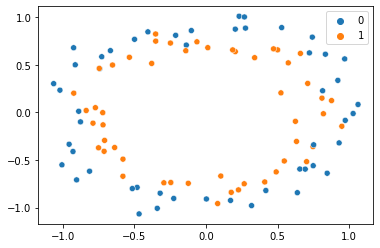

In [3]:
sns.scatterplot(X[:,0],X[:,1],hue=y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [5]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

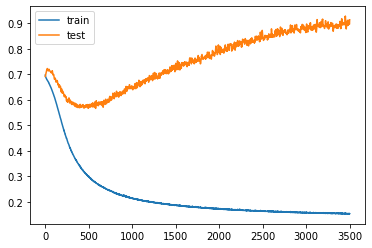

In [8]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

3888/3888 [==============================] - 5s 1ms/step


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


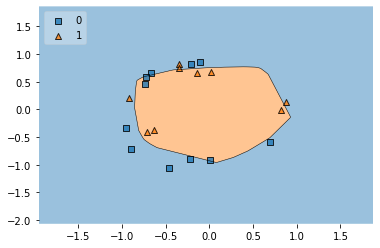

In [9]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

In [10]:
# Early Stopping

In [11]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [14]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 1s 75ms/step - loss: 0.6910 - accuracy: 0.5250 - val_loss: 0.7017 - val_accuracy: 0.4000
Epoch 2/3500
3/3 [==============================] - 0s 13ms/step - loss: 0.6888 - accuracy: 0.5250 - val_loss: 0.7016 - val_accuracy: 0.4000
Epoch 3/3500
3/3 [==============================] - 0s 13ms/step - loss: 0.6873 - accuracy: 0.5250 - val_loss: 0.7023 - val_accuracy: 0.4500
Epoch 4/3500
3/3 [==============================] - 0s 12ms/step - loss: 0.6864 - accuracy: 0.5250 - val_loss: 0.7035 - val_accuracy: 0.4000
Epoch 5/3500
3/3 [==============================] - 0s 12ms/step - loss: 0.6855 - accuracy: 0.5500 - val_loss: 0.7050 - val_accuracy: 0.4000
Epoch 6/3500
3/3 [==============================] - 0s 16ms/step - loss: 0.6847 - accuracy: 0.5625 - val_loss: 0.7062 - val_accuracy: 0.4000
Epoch 7/3500
3/3 [==============================] - 0s 13ms/step - loss: 0.6841 - accuracy: 0.5500 - val_loss: 0.7074 - val_accuracy: 0.4000
Epoch 8/3500


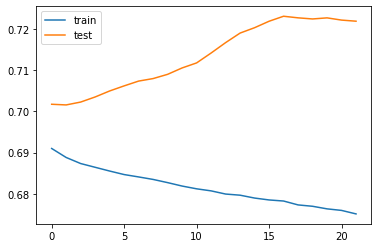

In [15]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

3888/3888 [==============================] - 5s 1ms/step


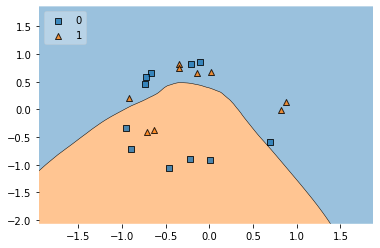

In [16]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()